In [212]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

from pandas_profiling import ProfileReport

In [213]:
donors = pd.read_csv("donors.csv")

C:\Users\fonse\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Initial Analysis

In [214]:
donors.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [215]:
donors.shape

(95412, 476)

In [216]:
donors.dtypes.head(10)

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
ZIP           object
MAILCODE      object
PVASTATE      object
DOB           object
NOEXCH        object
dtype: object

In [217]:
donors.isna().sum()

Unnamed: 0      0
ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
             ... 
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      132
Length: 476, dtype: int64

In [218]:
print(list(donors.isna().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 23883, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 83026, 21286, 0, 44732, 0, 52854, 52854, 52854, 52914, 52854, 52854, 52854, 52854, 52854, 52854, 52854, 52854, 52854, 52854, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [219]:
#To see if there are duplicated columns
donors.duplicated().sum()

0

In [220]:
#This only works for metric features?
donors.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,95412.0,47705.500000,27543.216279,0.000000,23852.750000,47705.500000,71558.250000,95411.0
TCODE,95412.0,54.223117,953.844476,0.000000,0.000000,1.000000,2.000000,72002.0
NUMCHLD,12386.0,1.527773,0.806861,1.000000,1.000000,1.000000,2.000000,7.0
INCOME,74126.0,3.886248,1.854960,1.000000,2.000000,4.000000,5.000000,7.0
WEALTH1,50680.0,5.345699,2.742490,0.000000,3.000000,6.000000,8.000000,9.0
...,...,...,...,...,...,...,...,...
TIMELAG,85439.0,8.093739,8.213242,0.000000,4.000000,6.000000,11.000000,1088.0
AVGGIFT,95412.0,13.347786,10.769997,1.285714,8.384615,11.636364,15.477955,1000.0
CONTROLN,95412.0,95778.176959,55284.596094,1.000000,47910.750000,95681.500000,143643.500000,191779.0
HPHONE_D,95412.0,0.500618,0.500002,0.000000,0.000000,1.000000,1.000000,1.0


# Visual Exploration of the Initial Data

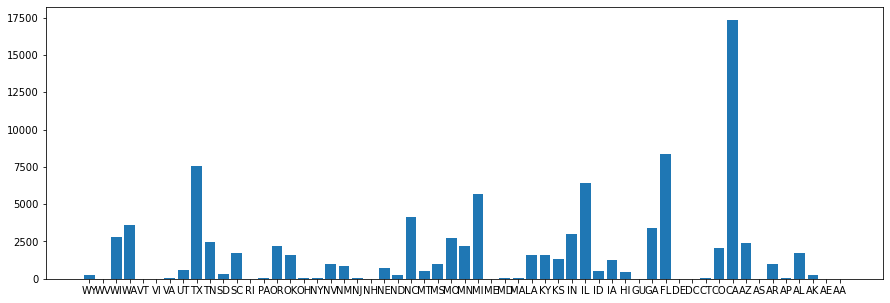

In [221]:
states = donors.STATE.value_counts().sort_index(ascending=False).to_frame()
plt.figure(figsize=(15,5))
plt.bar(states.index, states["STATE"])
plt.show()

In [222]:
birth_date = donors.DOB.value_counts().sort_index(ascending=False).to_frame()
#birth_date["date"] = birth_date.index
birth_date.index =  pd.to_datetime(birth_date.index)

birth_date = birth_date.groupby(pd.Grouper(freq="Y")).sum()
birth_date = birth_date[(birth_date.T != 0).any()]
birth_date

,DOB
1930-12-31,831
1931-12-31,593
1932-12-31,972
1933-12-31,738
1934-12-31,1255
...,...
2012-12-31,1
2013-12-31,2
2015-12-31,5
2016-12-31,6


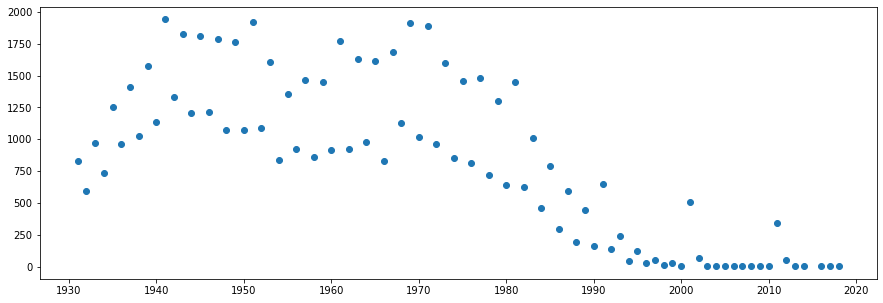

In [223]:
plt.figure(figsize=(15,5))
plt.scatter(birth_date.index, birth_date["DOB"])
plt.show()

# Data Cleaning and Preprocessing

In [224]:
#Make a copy of the original dataframe
donors_original = donors.copy()

In [225]:
#Replacing empty strings for NAN values, so that it is easier to clean the data
donors.replace(" ", np.nan, inplace=True)

In [226]:
donors.isna().sum()

Unnamed: 0      0
ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
             ... 
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
Length: 476, dtype: int64

In [227]:
print(list(donors.isna().sum()))

[0, 0, 928, 0, 0, 0, 94013, 93954, 23883, 7, 88709, 93395, 95298, 93795, 0, 2316, 22228, 94266, 93846, 93601, 92565, 83026, 21286, 2957, 44732, 0, 52854, 52854, 52854, 52914, 52854, 52854, 52854, 52854, 52854, 52854, 52854, 52854, 52854, 52854, 21280, 0, 0, 0, 0, 0, 0, 0, 95232, 89212, 95118, 43823, 80168, 90210, 84986, 86541, 87547, 94525, 81086, 83158, 82618, 84931, 90626, 87236, 88282, 82010, 93384, 84911, 93876, 94371, 94852, 54032, 50143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [228]:
#Drop columns that have more than 25% of Nan values
limit = donors.shape[0]
percentage = 0.75
donors.dropna(axis=1, thresh=limit * percentage, inplace=True)

In [229]:
donors.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,NOEXCH,MDMAUD,DOMAIN,HOMEOWNR,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,0,XXXX,T2,NaN,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,0,XXXX,S1,H,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,0,XXXX,R2,U,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,0,XXXX,R2,U,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,NaN,0,FL,33176,0,XXXX,S2,H,...,6.864865,7112,1,L,2,F,X,X,X,A


In [230]:
print(list(donors.isna().sum()))

[0, 0, 928, 0, 0, 0, 7, 0, 2316, 22228, 21286, 2957, 0, 21280, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1950, 2191, 3557, 8874, 3511, 11245, 10422, 8923,

In [231]:
#Fazer a separação das metric features e non-metric features

#To see the diferent dtypes of the dataset
set(donors.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [232]:
#Metric features
metric_features = donors.select_dtypes(exclude=['O'])
metric_features

,Unnamed: 0,TCODE,INCOME,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,...,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,0,0,NaN,0,0,39,34,18,10,2,...,31,14,5.0,12.0,10.0,4.0,7.741935,95515,0,4
1,1,1,6.0,16,0,15,55,11,6,2,...,3,1,10.0,25.0,25.0,18.0,15.666667,148535,0,2
2,2,1,3.0,2,0,20,29,33,6,8,...,27,14,2.0,16.0,5.0,12.0,7.481481,15078,1,4
3,3,0,1.0,2,0,23,14,31,3,0,...,16,7,2.0,11.0,10.0,9.0,6.812500,172556,1,4
4,4,0,3.0,60,1,28,9,53,26,3,...,37,8,3.0,15.0,15.0,14.0,6.864865,7112,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,1,NaN,0,14,36,47,11,7,8,...,1,0,25.0,25.0,25.0,NaN,25.000000,184568,0,1
95408,95408,1,7.0,1,0,31,43,19,4,1,...,1,0,20.0,20.0,20.0,NaN,20.000000,122706,1,1
95409,95409,1,NaN,0,0,18,46,20,7,23,...,7,4,3.0,10.0,10.0,3.0,8.285714,189641,1,3
95410,95410,0,7.0,0,0,28,35,20,9,1,...,41,18,5.0,21.0,18.0,4.0,12.146341,4693,1,4


In [233]:
metric_features.isna().sum()

Unnamed: 0        0
TCODE             0
INCOME        21286
HIT               0
MALEMILI          0
              ...  
TIMELAG        9973
AVGGIFT           0
CONTROLN          0
HPHONE_D          0
RFA_2F            0
Length: 312, dtype: int64

In [234]:
metric_features_list = list(metric_features)
#metric_features_list

In [235]:
#Non metric features
non_metric_features = donors.select_dtypes(exclude=['int64', 'float64'])
non_metric_features

,ODATEDW,OSOURCE,STATE,ZIP,NOEXCH,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,...,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,IL,61081,0,XXXX,T2,NaN,F,NaN,...,2014-02-01,2015-12-01,2009-11-01,2010-03-01,L,E,X,X,X,C
1,2014-01-01,BOA,CA,91326,0,XXXX,S1,H,M,3,...,2015-12-01,2015-12-01,2013-10-01,2015-04-01,L,G,X,X,X,A
2,2010-01-01,AMH,NC,27017,0,XXXX,R2,U,M,3,...,2012-07-01,2015-12-01,2010-01-01,2011-01-01,L,E,X,X,X,C
3,2007-01-01,BRY,CA,95953,0,XXXX,R2,U,F,3,...,2014-11-01,2015-12-01,2007-02-01,2007-11-01,L,E,X,X,X,C
4,2006-01-01,NaN,FL,33176,0,XXXX,S2,H,F,3,...,2016-01-01,2016-01-01,1999-03-01,2000-05-01,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,AK,99504,0,XXXX,C2,NaN,M,NaN,...,2016-02-01,2016-02-01,2016-02-01,NaN,L,G,X,X,X,C
95408,2016-01-01,DCD,TX,77379,0,XXXX,C1,H,M,3,...,2016-03-01,2016-03-01,2016-03-01,NaN,L,F,X,X,X,A
95409,2015-01-01,MBC,MI,48910,0,XXXX,C3,NaN,M,NaN,...,2015-01-01,2016-10-01,2014-10-01,2015-01-01,L,E,X,X,X,B
95410,2006-01-01,PRV,CA,91320,0,XXXX,C1,H,F,2,...,2016-08-01,2017-01-01,2006-12-01,2007-04-01,L,F,X,X,X,A


In [236]:
#non_metric_features.isna().sum()

In [237]:
non_metric_features_list = list(non_metric_features)
#non_metric_features_list

In [238]:
#Using KNNImputer we can fill the remaining missing values only for the metric features

# Creating a copy to apply central tendency measures imputation
donors_central = donors.copy()

In [239]:
donors_central.median()

Unnamed: 0    47705.500000
TCODE             1.000000
INCOME            4.000000
HIT               0.000000
DATASRCE          3.000000
                  ...     
TIMELAG           6.000000
AVGGIFT          11.636364
CONTROLN      95681.500000
HPHONE_D          1.000000
RFA_2F            2.000000
Length: 313, dtype: float64

In [240]:
modes = donors_central[non_metric_features_list].mode().loc[0]
modes

ODATEDW     2015-01-01
OSOURCE            MBC
STATE               CA
ZIP              85351
NOEXCH               0
MDMAUD            XXXX
DOMAIN              R2
HOMEOWNR             H
GENDER               F
DATASRCE             3
ADATE_2     2017-06-01
ADATE_3     2016-06-01
ADATE_4     2016-04-01
ADATE_6     2016-03-01
ADATE_7     2016-02-01
ADATE_8     2016-01-01
ADATE_9     2015-11-01
ADATE_11    2015-10-01
ADATE_12    2015-08-01
ADATE_14    2015-06-01
ADATE_16    2015-03-01
ADATE_18    2015-01-01
RFA_2              L1F
RFA_3              A1F
RFA_4              A1F
RFA_6              A1F
RFA_7              A1F
RFA_8              A1F
RFA_9              A1F
RFA_11             A1F
RFA_12             A1F
RFA_14             A1F
RFA_16             A1E
RFA_18             A1E
MAXADATE    2017-02-01
MINRDATE    2016-02-01
MAXRDATE    2015-12-01
LASTDATE    2015-12-01
FISTDATE    2015-01-01
NEXTDATE    2015-04-01
RFA_2R               L
RFA_2A               F
MDMAUD_R             X
MDMAUD_F   

In [241]:
donors_central.fillna(donors_central.median(), inplace=True)
donors_central.fillna(modes, inplace=True)
donors_central.isna().sum()  # checking how many NaNs we still have

Unnamed: 0    0
ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
             ..
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2      0
Length: 358, dtype: int64

In [242]:
# Creating new df copy to explore neighbordhood imputation
donors_neighbors = donors.copy()

In [243]:
# Seeing rows with NaNs
nans_index = donors_neighbors.isna().any(axis=1)
donors_neighbors[nans_index]

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,NOEXCH,MDMAUD,DOMAIN,HOMEOWNR,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,0,XXXX,T2,NaN,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,0,XXXX,S1,H,...,15.666667,148535,0,L,2,G,X,X,X,A
4,4,2006-01-01,NaN,0,FL,33176,0,XXXX,S2,H,...,6.864865,7112,1,L,2,F,X,X,X,A
5,5,2014-01-01,CWR,0,AL,35603,0,XXXX,T2,NaN,...,12.750000,47784,0,L,1,F,X,X,X,C
9,9,2014-01-01,MSD,1,TN,37127-,0,XXXX,T1,NaN,...,9.333333,49909,0,L,1,F,X,X,X,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,95403,2010-01-01,LHJ,0,MN,55932,0,XXXX,R2,H,...,11.583333,84678,0,L,1,F,X,X,X,D
95405,95405,2012-01-01,HHH,28,CA,92581,0,XXXX,C3,NaN,...,26.666667,156106,0,L,1,G,X,X,X,A
95407,95407,2016-01-01,ASE,1,AK,99504,0,XXXX,C2,NaN,...,25.000000,184568,0,L,1,G,X,X,X,C
95408,95408,2016-01-01,DCD,1,TX,77379,0,XXXX,C1,H,...,20.000000,122706,1,L,1,F,X,X,X,A


In [244]:
# KNNImputer - only works for numerical varaibles
imputer = KNNImputer(n_neighbors=5, weights="uniform")
donors_neighbors[metric_features_list] = imputer.fit_transform(donors_neighbors[metric_features_list])

MemoryError: Unable to allocate 1023. MiB for an array with shape (1406, 95412) and data type float64

In [208]:
# See rows with NaNs imputed
donors_neighbors.loc[nans_index, metric_features]

ValueError: Cannot index with multidimensional key

In [ ]:
# let's keep the central imputation
df = df_central.copy()

In [ ]:
#Remover outliers